In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Grid World environment
class GridWorld:
    def __init__(self):
        """
            0  1  2  3
        0 | 0  0  0  +1
        1 | 0  x  0  -1      x = obstacle
        2 | s  0  0  0       s = agent starting position
        """
        # state: 0=[0,0], 1=[0,1], 2=[0,2], 3=[0,3], 4=[1,0], ..., 10=[2,2], 11=[2,3]
        # action: 0=up, 1=down, 2=left, 3=right

        self.nrows = 12
        self.ncolumns = 12
        self.goal_rc = [(10,10)]
        self.trap_rc = [(2,9),
                        (4,9),(4,10),
                        (7,10),(8,10),(9,10),(10,8)]
        self.WALL_RC = [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11),
                        (11, 0), (11, 1), (11, 2), (11, 3), (11, 4), (11, 5), (11, 6), (11, 7), (11, 8), (11, 9), (11, 10), (11, 11),
                        (1, 0),(2, 0), (3, 0),(4, 0),(5, 0),(6, 0),(7, 0),(8, 0),(9, 0),(10, 0),
                        (1, 11),(2, 11), (3, 11),(4, 11),(5, 11),(6, 11),(7, 11),(8, 11),(9, 11),(10, 11),

                        (1,4),
                        (2,2),(2,4),(2,6),(2,7),(2,8),
                        (3,7),
                        (4,2),(4,3),(4,5),(4,7),
                        (5,7),
                        (6,1),(6,2),(6,3),(6,4),(6,5),(6,6),(6,7),(6,8),
                        (8,3),(8,4),(8,5),(8,6),(8,7),(8,8),(8,9),
                        (9,2),(9,3),(9,4),(9,5),(9,6)]

        """#hard map
        self.nrows = 12
        self.ncolumns = 12
        self.goal_rc = [(8,9)]
        self.trap_rc = [(7,6),
                        (8,8),
                        (9,8),(9,9),(9,10)]
        self.WALL_RC = [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11),
                        (11, 0), (11, 1), (11, 2), (11, 3), (11, 4), (11, 5), (11, 6), (11, 7), (11, 8), (11, 9), (11, 10), (11, 11),
                        (1, 0),(2, 0), (3, 0),(4, 0),(5, 0),(6, 0),(7, 0),(8, 0),(9, 0),(10, 0),
                        (1, 11),(2, 11), (3, 11),(4, 11),(5, 11),(6, 11),(7, 11),(8, 11),(9, 11),(10, 11),

                        (1,6),
                        (2,6),
                        (3,2),(3,3),(3,4),(3,6),(3,8),(3,9),
                        (4,4),(4,8),
                        (5,1),(5,4),(5,8),
                        (6,2),(6,4),(6,6),(6,7),(6,8),(6,9),(6,10),
                        (7,2),(7,4),
                        (8,4),(8,6),
                        (9,2),(9,4),(9,6),
                        (10,2)
                        ]"""

        """
        #easy map
        self.nrows = 5
        self.ncolumns = 5
        self.goal_rc = [(0,4)]
        self.trap_rc = [(4,0)]
        self.WALL_RC = [(1,2),(1,3),
                        (2,1),(2,2),(2,3),
                       (3,1),(3,2),(3,3)]"""

        self.rewards = np.zeros((self.nrows, self.ncolumns))
        self.rewards[tuple(zip(*self.goal_rc))] = 1 # the goal state, reward = 1
        self.rewards[tuple(zip(*self.trap_rc))] = -1 # the lose state, reward = -1
        #start from 0
        self.actions = ['up', 'down', 'left', 'right']
        self.agent_init_pos = [1,1]
        self.agent_pos = self.agent_init_pos  # starting position of the agent

    def step(self, action):
        """
        Given an action (0=up, 1=down, 2=left, 3=right),
        return the next valid state index (0~11) and reward R(s,a)
        """
        r, c = self.agent_pos #row, column
        if action == 0:  # move up
            r = max(r - 1, 0)
        elif action == 1:  # move down
            r = min(r + 1, self.nrows-1)
        elif action == 2:  # move left
            c = max(c - 1, 0)
        elif action == 3:  # move right
            c = min(c + 1, self.ncolumns-1)

        if (r,c) not in self.WALL_RC:  # obstacle at [1,1]
            self.agent_pos = [r, c] #agent moved
            reward = 0
        else:
            reward = -0.5#-0.5

        reward += -0.04
        reward += self.rewards[self.agent_pos[0], self.agent_pos[1]]

        return self.agentPosIndex(), reward

    def isTerminal(self):
        """
        Return True if the agent is at a terminal state
        """
        return tuple(self.agent_pos) in self.goal_rc or self.agent_pos in self.trap_rc

    def reset(self):
        """
        Reset the grid world
        """
        self.agent_pos = self.agent_init_pos  # reset to starting position

    def agentPosIndex(self):
        """
        Return the current position index (0-11) of the agent in the grid world
        0=[0,0], 1=[0,1], 2=[0,2], 3=[0,3], 4=[1,0], ..., 10=[2,2], 11=[2,3]
        """
        return self.agent_pos[0] * self.nrows + self.agent_pos[1]

    def gridSize(self):
        """
        Return the size of the GridWorld
        """
        return (self.nrows * self.ncolumns)

    def numActions(self):
        """
        Return the number of actions
        """
        return len(self.actions)

    def showGrid(self):
        """
        Display the Grid World
        """
        for i in range(0, self.nrows):
            print('-------------------------------------------------')
            out = '| '
            for j in range(0, self.ncolumns):
                token = ' '
                if (i,j) in self.WALL_RC: # obstacle
                    token = 'X'
                if (i,j) in self.goal_rc: # goal state
                    token = 'G'
                if (i,j) in self.trap_rc: # lose state
                    token = 'L'
                if i == self.agent_pos[0] and j == self.agent_pos[1]: # agent pos
                    token = '*'

                out += token + ' | '
            print(out)
        print('-------------------------------------------------')


In [2]:
env = GridWorld()
env.showGrid()

-------------------------------------------------
| X | X | X | X | X | X | X | X | X | X | X | X | 
-------------------------------------------------
| X | * |   |   | X |   |   |   |   |   |   | X | 
-------------------------------------------------
| X |   | X |   | X |   | X | X | X | L |   | X | 
-------------------------------------------------
| X |   |   |   |   |   |   | X |   |   |   | X | 
-------------------------------------------------
| X |   | X | X |   | X |   | X |   | L | L | X | 
-------------------------------------------------
| X |   |   |   |   |   |   | X |   |   |   | X | 
-------------------------------------------------
| X | X | X | X | X | X | X | X | X |   |   | X | 
-------------------------------------------------
| X |   |   |   |   |   |   |   |   |   | L | X | 
-------------------------------------------------
| X |   |   | X | X | X | X | X | X | X | L | X | 
-------------------------------------------------
| X |   | X | X | X | X | X |   |   |   |

In [3]:
env.agent_pos = [7, 8]
next_state, reward = env.step(action=0)
print(reward)
print(env.isTerminal())
env.showGrid()

-0.54
False
-------------------------------------------------
| X | X | X | X | X | X | X | X | X | X | X | X | 
-------------------------------------------------
| X |   |   |   | X |   |   |   |   |   |   | X | 
-------------------------------------------------
| X |   | X |   | X |   | X | X | X | L |   | X | 
-------------------------------------------------
| X |   |   |   |   |   |   | X |   |   |   | X | 
-------------------------------------------------
| X |   | X | X |   | X |   | X |   | L | L | X | 
-------------------------------------------------
| X |   |   |   |   |   |   | X |   |   |   | X | 
-------------------------------------------------
| X | X | X | X | X | X | X | X | X |   |   | X | 
-------------------------------------------------
| X |   |   |   |   |   |   |   | * |   | L | X | 
-------------------------------------------------
| X |   |   | X | X | X | X | X | X | X | L | X | 
-------------------------------------------------
| X |   | X | X | X | X | X |

In [4]:
# Define the Q-learning agent
class QLearningAgent:
    def __init__(self, n_states, n_actions, alpha=0.5, gamma=0.9, epsilon=0.5, exploration_proba_decay = 0.08):
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.explore_decay = exploration_proba_decay
        # Q-table [n_states, n_actions]
        self.q_table = np.zeros((n_states, n_actions)) # initialized to zeros
        # policy
        self.policy = np.random.randint(n_actions, size=n_states)

    def choose_action(self, state):
        """
        Epsilon-greedy policy: with probability epsilon, choose a random action,
        otherwise choose the action with the highest Q-value for the state
        """
        action = 0
        if np.random.uniform() < self.epsilon:
            action = np.random.randint(self.q_table.shape[1])
        else:
            action = np.argmax(self.q_table[state])
        return action

    def update(self, state, action, reward, next_state):
        """
        Update the Q-value for the (state, action) pair
        """
        self.q_table[state, action] += self.alpha * (reward + self.gamma *
                                                      np.max(self.q_table[next_state]) - self.q_table[state, action])

    def train(self, env, n_episodes=1000, max_steps=1000):
        """
        Train the agent to navigate in the given environment using Q-learning
        """
        print('Training starts...')
        rewards_history = []

        """step 1: initialize Q-table with zeros"""
        self.q_table[:] = 0

        for episode in range(n_episodes):
            env.reset() # reset the environment
            state = env.agentPosIndex()  # starting state
            total_reward = 0
            n_steps = 0
            done = False
            while not done:
                """step 2: choose action for current state"""
                action = self.choose_action(state)

                """step 3: take the action, get the reward and next_state"""
                next_state, reward = env.step(action)

                """step 4: update the Q-table"""
                self.update(state, action, reward, next_state)

                """step 5: set state to next_state"""
                state = next_state

                # stop if terminal state or n_steps >= max_steps
                n_steps += 1
                total_reward += reward
                if env.isTerminal() or n_steps >= max_steps:
                    print(f'Episode: {episode+1}, Total Reward: {total_reward:.2f},\tEpsilon: {self.epsilon:.2f}, Reached Goal: {env.isTerminal()}')
                    done = True
                if env.isTerminal():
                    self.epsilon = self.epsilon * np.exp(-self.explore_decay)

            rewards_history.append(total_reward)

        # generate the optimal policy found after training
        for s in range(self.q_table.shape[0]):
            self.policy[s] = np.argmax(self.q_table[s])

        print('...Training completed!')
        return rewards_history

    def play(self, env, max_steps=100, show_grid=False):
        """
        Play/Test the trained Q-learning agent
        """
        env.reset() # reset to starting state
        state = env.agentPosIndex()
        done = False
        n_steps = 0

        while not done:
            action = self.policy[state]  #or action = np.argmax(self.q_table[state])

            if show_grid:
                env.showGrid()
                print(f'action = {action} ({env.actions[action]})')

            next_state, reward = env.step(action)
            state = next_state

            n_steps += 1
            if n_steps > max_steps:
                done = True
                print("Failed to reach goal after", max_steps, "steps!")

            if env.isTerminal():
                done = True
                print(f"Goal reached with {n_steps} steps!")


In [5]:
def plot(y,x_label="x", y_label="y", title=None):
    x = list(range(len(y)))

    plt.plot(x, y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if title is None:
        plt.title(y_label + " VS " + x_label)
    else:
        plt.title(title)
    plt.show()

In [6]:
env = GridWorld()
agent = QLearningAgent(env.gridSize(), env.numActions(), alpha=0.5, gamma=0.9, epsilon=0.3, exploration_proba_decay = 0.01)
rewards_history = agent.train(env, n_episodes=700, max_steps=1000)

Training starts...
Episode: 1, Total Reward: -147.98,	Epsilon: 0.30, Reached Goal: True
Episode: 2, Total Reward: -76.90,	Epsilon: 0.30, Reached Goal: True
Episode: 3, Total Reward: -41.24,	Epsilon: 0.29, Reached Goal: True
Episode: 4, Total Reward: -38.58,	Epsilon: 0.29, Reached Goal: True
Episode: 5, Total Reward: -39.72,	Epsilon: 0.29, Reached Goal: True
Episode: 6, Total Reward: -27.74,	Epsilon: 0.29, Reached Goal: True
Episode: 7, Total Reward: -21.48,	Epsilon: 0.28, Reached Goal: True
Episode: 8, Total Reward: -19.52,	Epsilon: 0.28, Reached Goal: True
Episode: 9, Total Reward: -27.16,	Epsilon: 0.28, Reached Goal: True
Episode: 10, Total Reward: -14.32,	Epsilon: 0.27, Reached Goal: True
Episode: 11, Total Reward: -40.20,	Epsilon: 0.27, Reached Goal: True
Episode: 12, Total Reward: -15.02,	Epsilon: 0.27, Reached Goal: True
Episode: 13, Total Reward: -16.86,	Epsilon: 0.27, Reached Goal: True
Episode: 14, Total Reward: -22.94,	Epsilon: 0.26, Reached Goal: True
Episode: 15, Total Rewa

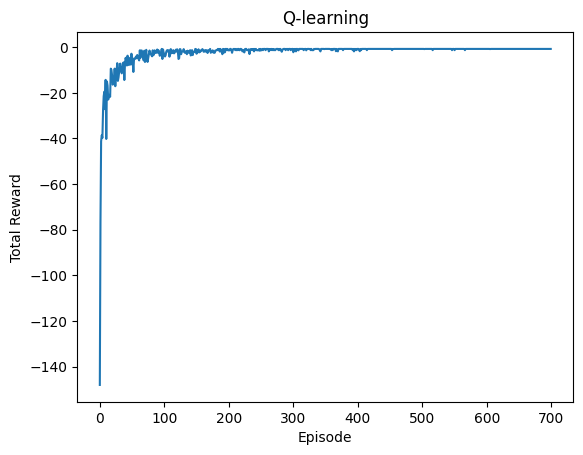

In [7]:
plot(y=rewards_history, x_label="Episode", y_label="Total Reward", title="Q-learning")

In [8]:
# Test the trained Q-learning agent
agent.play(env, max_steps=60, show_grid=True)

-------------------------------------------------
| X | X | X | X | X | X | X | X | X | X | X | X | 
-------------------------------------------------
| X | * |   |   | X |   |   |   |   |   |   | X | 
-------------------------------------------------
| X |   | X |   | X |   | X | X | X | L |   | X | 
-------------------------------------------------
| X |   |   |   |   |   |   | X |   |   |   | X | 
-------------------------------------------------
| X |   | X | X |   | X |   | X |   | L | L | X | 
-------------------------------------------------
| X |   |   |   |   |   |   | X |   |   |   | X | 
-------------------------------------------------
| X | X | X | X | X | X | X | X | X |   |   | X | 
-------------------------------------------------
| X |   |   |   |   |   |   |   |   |   | L | X | 
-------------------------------------------------
| X |   |   | X | X | X | X | X | X | X | L | X | 
-------------------------------------------------
| X |   | X | X | X | X | X |   |   |   |